In [492]:
#We are importing all the required libraries here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime
import time
from matplotlib import style
# plt.style()
plt.style.available
sns.set(style="darkgrid", context="talk", color_codes=True)  
%matplotlib inline

In [493]:
countries = pd.read_csv('Countries.csv')

In [494]:
countries.head(1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [495]:
# Renaming the columns.
countries['Area']=countries['Area (sq. mi.)']
countries['Population density']=countries['Pop. Density (per sq. mi.)']
countries['Coast_byarea']=countries['Coastline (coast/area ratio)']
countries['Literacy_percent']=countries['Literacy (%)']
countries['Arable_%']=countries['Arable (%)']
countries['Crops_%']=countries['Crops (%)']
countries['GDP_percapita']=countries['GDP ($ per capita)']
countries['Phones_per1000']=countries['Phones (per 1000)']
countries['Other']=countries['Other (%)']
countries['Infant_mortality_per1000']=countries['Infant mortality (per 1000 births)']
countries['Net_migration']=countries['Net migration']

In [496]:
# droping all the unnecessary columns.
countries=countries.drop(columns=['Area (sq. mi.)', 'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)'
                       ,'Literacy (%)','Arable (%)','Crops (%)','Other (%)','GDP ($ per capita)','Phones (per 1000)','Infant mortality (per 1000 births)','Net migration'])

In [497]:
# Like you may see, the columns contain numbers in the form of [x,y] which are supposed to be decimal values.
# Converting such numbers to float type
plot_cols2=['Net_migration','Birthrate','Deathrate','Agriculture','Industry','Service','Population density'
      ,'Coast_byarea','Literacy_percent','Arable_%','Crops_%','Phones_per1000','Infant_mortality_per1000']

for x in plot_cols2:
    
    countries[x]=countries[x].str.split(',')
    countries[x]=countries[x].astype(object)
    countries[x]=countries[x].str.join('.')
    countries[x]=countries[x].astype(float)

In [498]:
countries.head(20)

,Country,Region,Population,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Area,Population density,Coast_byarea,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Other,Infant_mortality_per1000,Net_migration
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,1,46.60,20.34,0.380,0.240,0.380,647500,48.0,0.00,36.0,12.13,0.22,700.0,3.2,"87,65",163.07,23.06
1,Albania,EASTERN EUROPE,3581655,3,15.11,5.22,0.232,0.188,0.579,28748,124.6,1.26,86.5,21.09,4.42,4500.0,71.2,"74,49",21.52,-4.93
2,Algeria,NORTHERN AFRICA,32930091,1,17.14,4.61,0.101,0.600,0.298,2381740,13.8,0.04,70.0,3.22,0.25,6000.0,78.1,"96,53",31.00,-0.39
3,American Samoa,OCEANIA,57794,2,22.46,3.27,NaN,NaN,NaN,199,290.4,58.29,97.0,10.00,15.00,8000.0,259.5,75,9.27,-20.71
4,Andorra,WESTERN EUROPE,71201,3,8.71,6.25,NaN,NaN,NaN,468,152.1,0.00,100.0,2.22,0.00,19000.0,497.2,"97,78",4.05,6.60
5,Angola,SUB-SAHARAN AFRICA,12127071,NaN,45.11,24.20,0.096,0.658,0.246,1246700,9.7,0.13,42.0,2.41,0.24,1900.0,7.8,"97,35",191.19,0.00
6,Anguilla,LATIN AMER. & CARIB,13477,2,14.17,5.34,0.040,0.180,0.780,102,132.1,59.80,95.0,0.00,0.00,8600.0,460.0,100,21.03,10.76
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,2,16.93,5.37,0.038,0.220,0.743,443,156.0,34.54,89.0,18.18,4.55,11000.0,549.9,"77,27",19.46,-6.15
8,Argentina,LATIN AMER. & CARIB,39921833,3,16.73,7.55,0.095,0.358,0.547,2766890,14.4,0.18,97.1,12.31,0.48,11200.0,220.4,"87,21",15.18,0.61
9,Armenia,C.W. OF IND. STATES,2976372,4,12.07,8.23,0.239,0.343,0.418,29800,99.9,0.00,98.6,17.55,2.30,3500.0,195.7,"80,15",23.28,-6.47


In [499]:
countries.dtypes

Country                      object
Region                       object
Population                    int64
Climate                      object
Birthrate                   float64
Deathrate                   float64
Agriculture                 float64
Industry                    float64
Service                     float64
Area                          int64
Population density          float64
Coast_byarea                float64
Literacy_percent            float64
Arable_%                    float64
Crops_%                     float64
GDP_percapita               float64
Phones_per1000              float64
Other                        object
Infant_mortality_per1000    float64
Net_migration               float64
dtype: object

In [500]:
countries.describe()

,Population,Birthrate,Deathrate,Agriculture,Industry,Service,Area,Population density,Coast_byarea,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Infant_mortality_per1000,Net_migration
count,2.270000e+02,224.000000,223.000000,212.000000,211.000000,212.000000,2.270000e+02,227.000000,227.000000,209.000000,225.000000,225.000000,226.000000,223.000000,224.000000,224.000000
mean,2.874028e+07,22.114732,9.241345,0.150844,0.282711,0.565283,5.982270e+05,379.047137,21.165330,82.838278,13.797111,4.564222,9689.823009,236.061435,35.506964,0.038125
std,1.178913e+08,11.176716,4.990026,0.146798,0.138272,0.165841,1.790282e+06,1660.185825,72.286863,19.722173,13.040402,8.361470,10049.138513,227.991829,35.389899,4.889269
min,7.026000e+03,7.290000,2.290000,0.000000,0.020000,0.062000,2.000000e+00,0.000000,0.000000,17.600000,0.000000,0.000000,500.000000,0.200000,2.290000,-20.990000
25%,4.376240e+05,12.672500,5.910000,0.037750,0.193000,0.429250,4.647500e+03,29.150000,0.100000,70.600000,3.220000,0.190000,1900.000000,37.800000,8.150000,-0.927500
50%,4.786994e+06,18.790000,7.840000,0.099000,0.272000,0.571000,8.660000e+04,78.800000,0.730000,92.500000,10.420000,1.030000,5550.000000,176.200000,21.000000,0.000000
75%,1.749777e+07,29.820000,10.605000,0.221000,0.341000,0.678500,4.418110e+05,190.150000,10.345000,98.000000,20.000000,4.440000,15700.000000,389.650000,55.705000,0.997500
max,1.313974e+09,50.730000,29.740000,0.769000,0.906000,0.954000,1.707520e+07,16271.500000,870.660000,100.000000,62.110000,50.680000,55100.000000,1035.600000,191.190000,23.060000


In [525]:
# Changing the names of columns for sake of simplicity.
# Because the current column names seem very hard to comprehend because of excessive spacing.

con = {'ASIA (EX. NEAR EAST)         ':'Asia', 'EASTERN EUROPE                     ':'Europe', 
                    'NORTHERN AFRICA                    ':'Africa', 'LATIN AMER. & CARIB    ':'South America',
                    'NORTHERN AMERICA                   ':'North America', 'SUB-SAHARAN AFRICA                 ':'Africa',
       'BALTICS                            ':'Asia','NEAR EAST                          ':'Asia',
       'WESTERN EUROPE                     ':'Europe','C.W. OF IND. STATES ':'Asia',
       'OCEANIA                            ':'Oceania'}
countries['Continent'] = [con[x] for x in countries['Region']]

In [533]:
countries.query("Continent=='South America'").head(200)

,Country,Region,Population,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Area,...,Coast_byarea,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Other,Infant_mortality_per1000,Net_migration,Continent
6,Anguilla,LATIN AMER. & CARIB,13477,2,14.17,5.34,0.040,0.180,0.780,102,...,59.8,95.0,0.00,0.00,8600.0,460.0,100,21.03,10.76,South America
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,2,16.93,5.37,0.038,0.220,0.743,443,...,34.54,89.0,18.18,4.55,11000.0,549.9,"77,27",19.46,-6.15,South America
8,Argentina,LATIN AMER. & CARIB,39921833,3,16.73,7.55,0.095,0.358,0.547,2766890,...,0.18,97.1,12.31,0.48,11200.0,220.4,"87,21",15.18,0.61,South America
10,Aruba,LATIN AMER. & CARIB,71891,2,11.03,6.68,0.004,0.333,0.663,193,...,35.49,97.0,10.53,0.00,28000.0,516.1,"89,47",5.89,0.00,South America
14,"Bahamas, The",LATIN AMER. & CARIB,303770,2,17.57,9.05,0.030,0.070,0.900,13940,...,25.41,95.6,0.80,0.40,16700.0,460.6,"98,8",25.21,-2.20,South America
17,Barbados,LATIN AMER. & CARIB,279912,2,12.71,8.67,0.060,0.160,0.780,431,...,22.51,97.4,37.21,2.33,15700.0,481.9,"60,46",12.50,-0.31,South America
20,Belize,LATIN AMER. & CARIB,287730,2,28.84,5.72,0.142,0.152,0.612,22966,...,1.68,94.1,2.85,1.71,4900.0,115.7,"95,44",25.69,0.00,South America
24,Bolivia,LATIN AMER. & CARIB,8989046,"1,5",23.30,7.53,0.128,0.352,0.520,1098580,...,0,87.2,2.67,0.19,2400.0,71.9,"97,14",53.11,-1.32,South America
27,Brazil,LATIN AMER. & CARIB,188078227,2,16.56,6.17,0.084,0.400,0.516,8511965,...,0.09,86.4,6.96,0.90,7600.0,225.3,"92,15",29.61,-0.03,South America
28,British Virgin Is.,LATIN AMER. & CARIB,23098,2,14.89,4.42,0.018,0.062,0.920,153,...,52.29,97.8,20.00,6.67,16000.0,506.5,"73,33",18.05,10.01,South America


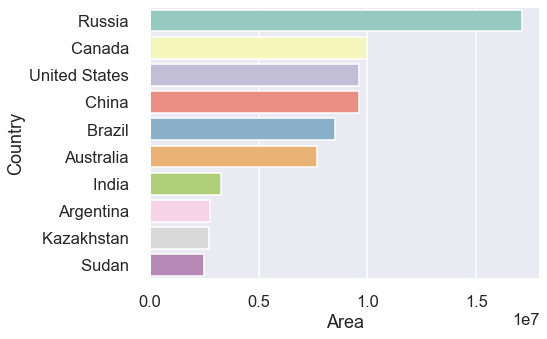

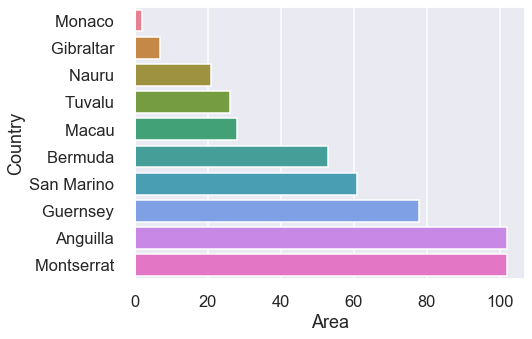

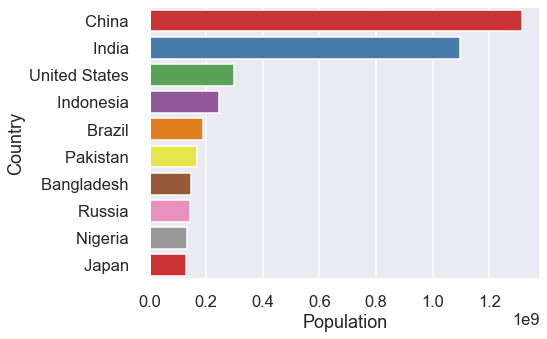

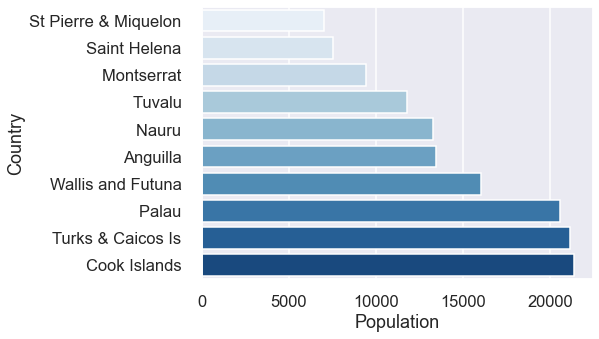

In [502]:
#10 countries with largest Area
# countries2 is a dataset derived from the old dataset 'countries'containing 10 countries with largest Area
countries2=countries.nlargest(10,'Area')
plt.figure(figsize=(7,5))    
sns.barplot(y='Country',x='Area',data=countries2,palette='Set3')

#countries3 is a dataset derived from the old dataset 'countries'containing 10 countries with smallest Area
countries3=countries.nsmallest(10,'Area')
plt.figure(figsize=(7,5))   
# 10 countries with smallest Area
sns.barplot(y='Country',x='Area',data=countries3,palette='husl')

#countries4 is a dataset derived from the old dataset 'countries'containing 10 countries with largest population
countries4=countries.nlargest(10,'Population')
plt.figure(figsize=(7,5))
# 10 countries with largest Population
sns.barplot(y='Country',x='Population',data=countries4,palette='Set1')


#countries5 is a dataset derived from the old dataset 'countries'containing 10 countries with smallest population
countries5=countries.nsmallest(10,'Population')
plt.figure(figsize=(7,5))
# 10 countries with smallest Population
sns.barplot(y='Country',x='Population',data=countries5,palette='Blues')


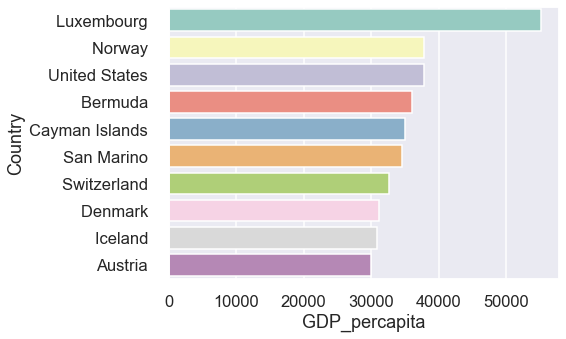

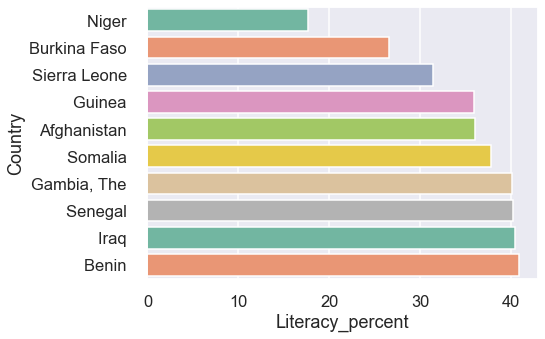

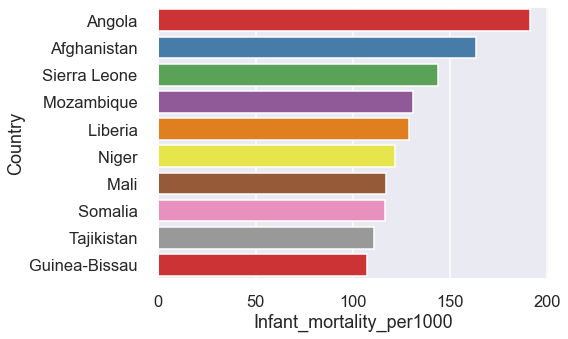

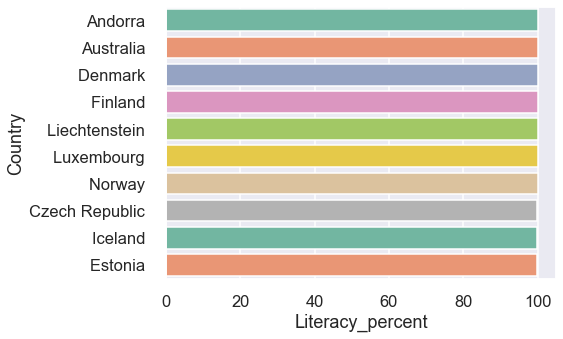

In [503]:
# 10 countries with largest GDP
plt.figure(figsize=(7,5))
largest_gdp=countries.nlargest(10,'GDP_percapita')
sns.barplot(y='Country',x='GDP_percapita',data=largest_gdp,palette='Set3')

# 10 countries with least literacy.
plt.figure(figsize=(7,5))
small_literacy=countries.nsmallest(10,'Literacy_percent')
sns.barplot(y='Country',x='Literacy_percent',data=small_literacy,palette='Set2')

# 10 countries with most Infant mortality.
plt.figure(figsize=(7,5))
largest_infant_mor=countries.nlargest(10,'Infant_mortality_per1000')
sns.barplot(y='Country',x='Infant_mortality_per1000',data=largest_infant_mor,palette='Set1')


# 10 countries with most literacy.
plt.figure(figsize=(7,5))
small_literacy=countries.nlargest(10,'Literacy_percent')
sns.barplot(y='Country',x='Literacy_percent',data=small_literacy,palette='Set2')


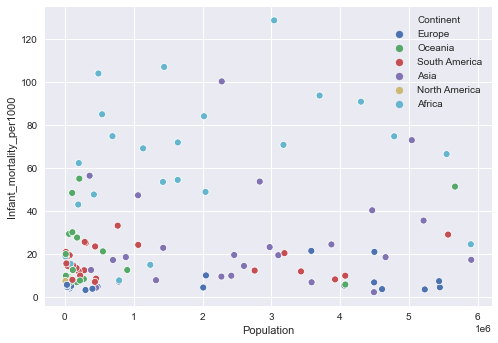

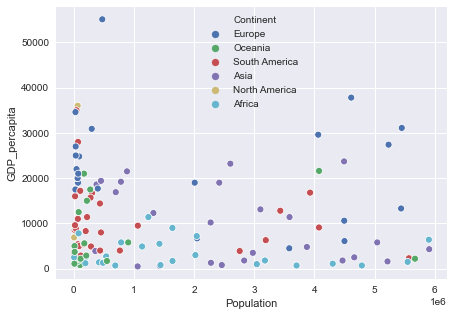

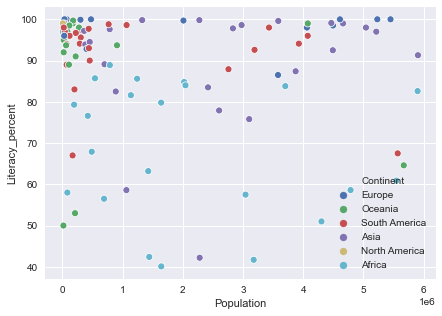

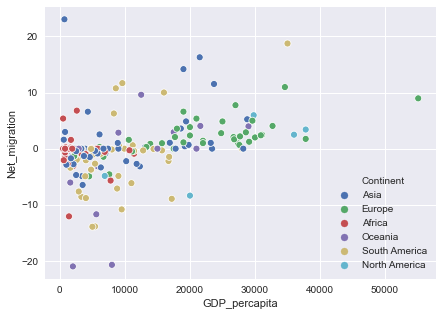

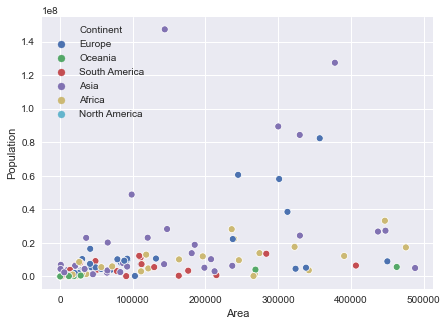

In [504]:
# Relationship between Infant mortality and Population
style.use('seaborn')
# Relationship between Infant mortality and Population
y=countries.query('Population<6000000')
bx = sns.scatterplot(x='Population', y="Infant_mortality_per1000", data=y,hue='Continent')


plt.figure(figsize=(7,5))
# Relationship between GDP and Population

y=countries.query('Population<6000000')
bx = sns.scatterplot(x='Population', y="GDP_percapita", data=y,hue='Continent')


plt.figure(figsize=(7,5))
# Gdp's effect on Literacy percentage
y=countries.query('Population<6000000')
bx = sns.scatterplot(x='Population', y="Literacy_percent", data=y,hue='Continent')


plt.figure(figsize=(7,5))
# Relationship of GDP with Net migration of all countries.
bx = sns.scatterplot(x="GDP_percapita", y="Net_migration", data=countries,hue='Continent')


plt.figure(figsize=(7,5))
# Relationship of Area with Population of all countries.
x=countries.query('Area<500000')
bx = sns.scatterplot(x='Area', y="Population", data=x,hue='Continent')

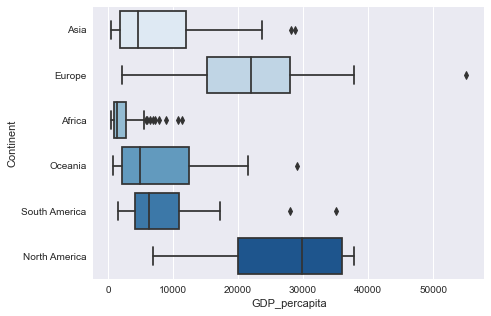

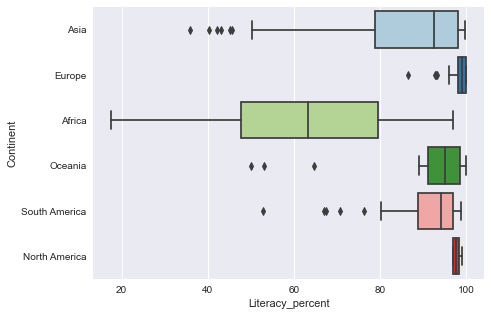

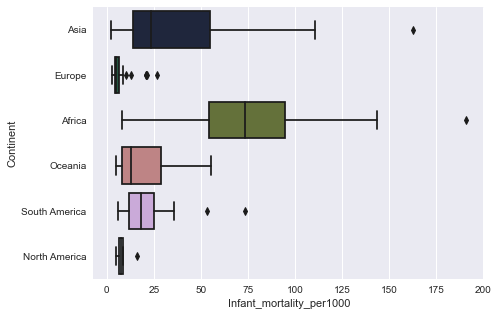

In [505]:
# Box plot of GDP and Literacy and pOpulation

plt.figure(figsize=(7,5))
ax = sns.boxplot(x="GDP_percapita", y="Continent", data=countries,palette='Blues')

plt.figure(figsize=(7,5))
ax = sns.boxplot(x="Literacy_percent", y="Continent", data=countries,palette='Paired')

plt.figure(figsize=(7,5))
ax = sns.boxplot(x="Infant_mortality_per1000", y="Continent", data=countries,palette='cubehelix')

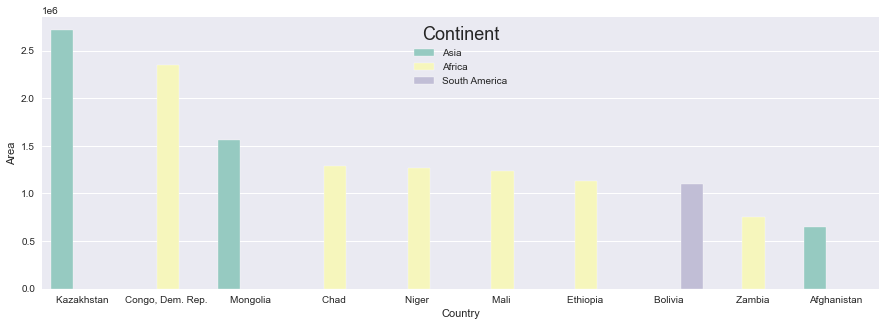

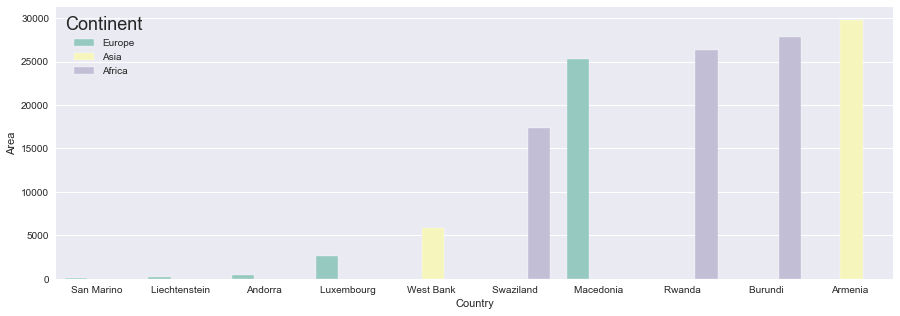

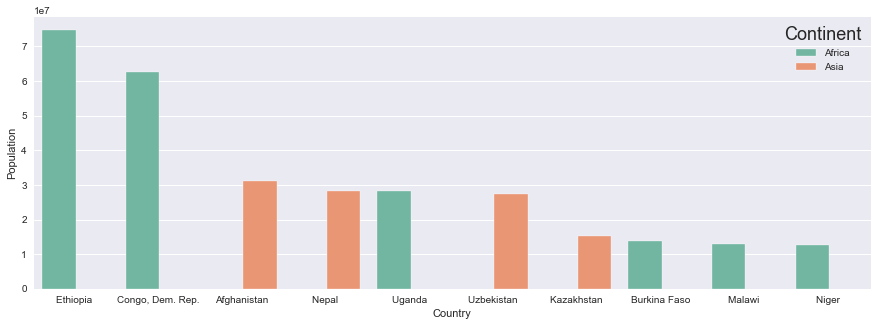

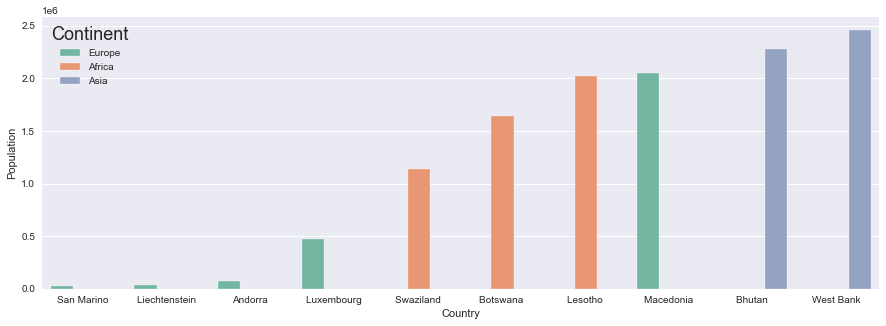

In [506]:
# checking for countries with no coastline.
# finding the countries without a coastline.

countries['Coast_byarea']= countries['Coast_byarea'].astype(object)
no_coast=countries[countries.Coast_byarea==0]

#  finding Top 10 countries with largest area and no coastline.
# this df contains data of only the countries without a Coastline
no_c_area=no_coast.nlargest(10,'Area')
style.use('seaborn')
plt.figure(figsize=(15,5))
chart=sns.barplot(no_c_area['Country'],no_c_area['Area'],hue=no_c_area['Continent'],palette='Set3')

# assigning the 10 countries with smallest areas to variable 'no_c_area'
# finding the countries with smallest Areas and having no coastline.
plt.figure(figsize=(15,5))
no_c_area=no_coast.nsmallest(10,'Area')
style.use('seaborn')
sns.barplot(no_c_area['Country'],no_c_area['Area'],hue=no_c_area['Continent'],palette='Set3')

# FInding Top 10 countries with largest Population and having no coastline.
no_c_pop=no_coast.nlargest(10,'Population')
style.use('seaborn')
plt.figure(figsize=(15,5))
sns.barplot(no_c_pop['Country'],no_c_pop['Population'],hue=no_c_pop['Continent'],palette='Set2')

# Top 10 countries with largest Population and having no coastline.
no_c_pop=no_coast.nsmallest(10,'Population')
style.use('seaborn')
plt.figure(figsize=(15,5))
sns.barplot(no_c_pop['Country'],no_c_pop['Population'],hue=no_c_pop['Continent'],palette='Set2')

In [507]:
no_coast.describe()

,Population,Birthrate,Deathrate,Agriculture,Industry,Service,Area,Population density,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Infant_mortality_per1000,Net_migration
count,4.400000e+01,43.000000,43.000000,42.000000,42.000000,42.000000,4.400000e+01,44.000000,41.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1.146231e+07,27.046744,13.027907,0.233310,0.279048,0.487738,4.393089e+05,98.634091,78.290244,15.927500,2.170909,7368.181818,152.609091,57.370455,0.890909
std,1.479860e+07,13.632518,6.436725,0.158501,0.098708,0.123294,6.282779e+05,108.498366,24.589610,13.649484,4.262406,11591.632361,198.416531,41.340117,4.585699
min,2.925100e+04,8.710000,3.920000,0.010000,0.099000,0.250000,6.100000e+01,1.800000,17.600000,0.650000,0.000000,600.000000,0.200000,3.930000,-6.470000
25%,2.940335e+06,12.045000,8.330000,0.099250,0.208500,0.403000,3.297100e+04,23.725000,62.700000,3.815000,0.137500,1100.000000,8.125000,13.250000,-0.687500
50%,8.025844e+06,27.410000,11.550000,0.216500,0.269500,0.481000,1.451405e+05,65.900000,90.700000,10.850000,0.475000,1850.000000,59.000000,67.335000,0.000000
75%,1.184682e+07,39.175000,16.235000,0.350250,0.342250,0.572000,6.060235e+05,122.075000,98.600000,23.305000,1.872500,6400.000000,230.075000,91.057500,0.440000
max,7.477798e+07,50.730000,29.740000,0.550000,0.515000,0.860000,2.717300e+06,479.500000,100.000000,55.300000,18.970000,55100.000000,704.300000,163.070000,23.060000


In [508]:
# top 10 countries based on GDP, infant mortality, literacy, Population density.
# First we group the countries based on highest literacy percentage and GDP since they should be high.
# Next we group the countries based on population density and infant mortality since they should be less.

best_countries=countries.nlargest(10,['Literacy_percent','GDP_percapita'])
best_countries1=best_countries.nsmallest(10,['Population density','Infant_mortality_per1000'])

In [509]:
# These are the top 10 countries to live in.
best_countries1.head(10)

,Country,Region,Population,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Area,...,Coast_byarea,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Other,Infant_mortality_per1000,Net_migration,Continent
11,Australia,OCEANIA,20264082,1,12.14,7.51,0.038,0.262,0.700,7686850,...,0.34,100.0,6.55,0.04,29000.0,565.5,"93,41",4.69,3.98,Oceania
93,Iceland,WESTERN EUROPE,299388,3,13.64,6.72,0.086,0.150,0.765,103000,...,4.83,99.9,0.07,0.00,30900.0,647.7,"99,93",3.31,2.38,Europe
154,Norway,WESTERN EUROPE,4610820,3,11.46,9.40,0.021,0.415,0.564,323802,...,7.77,100.0,2.87,0.00,37800.0,461.7,"97,13",3.70,1.74,Europe
68,Finland,WESTERN EUROPE,5231372,3,10.45,9.86,0.028,0.295,0.676,338145,...,0.37,100.0,7.19,0.03,27400.0,405.3,"92,78",3.57,0.95,Europe
64,Estonia,BALTICS,1324333,3,10.04,13.25,0.040,0.294,0.666,45226,...,8.39,99.8,16.04,0.45,12300.0,333.8,"83,51",7.87,-3.16,Asia
54,Denmark,WESTERN EUROPE,5450661,3,11.13,10.36,0.018,0.246,0.735,43094,...,16.97,100.0,54.02,0.19,31100.0,614.6,"45,79",4.56,2.48,Europe
53,Czech Republic,EASTERN EUROPE,10235455,3,9.02,10.59,0.034,0.393,0.573,78866,...,0,99.9,39.80,3.05,15700.0,314.3,"57,15",3.93,0.97,Europe
4,Andorra,WESTERN EUROPE,71201,3,8.71,6.25,NaN,NaN,NaN,468,...,0,100.0,2.22,0.00,19000.0,497.2,"97,78",4.05,6.60,Europe
121,Luxembourg,WESTERN EUROPE,474413,NaN,11.94,8.41,0.010,0.130,0.860,2586,...,0,100.0,23.28,0.40,55100.0,515.4,"76,32",4.81,8.97,Europe
119,Liechtenstein,WESTERN EUROPE,33987,4,10.21,7.18,0.060,0.390,0.550,160,...,0,100.0,25.00,0.00,25000.0,585.5,75,4.70,4.85,Europe


In [510]:
best_countries.describe()

,Population,Birthrate,Deathrate,Agriculture,Industry,Service,Area,Population density,Literacy_percent,Arable_%,Crops_%,GDP_percapita,Phones_per1000,Infant_mortality_per1000,Net_migration
count,1.000000e+01,10.000000,10.000000,9.000000,9.000000,9.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.799571e+06,10.874000,8.953000,0.037222,0.286111,0.676556,8.622197e+05,86.880000,99.960000,17.704000,0.416000,28330.000000,494.100000,4.519000,2.976000
std,6.372250e+06,1.499453,2.159198,0.023387,0.102505,0.103054,2.401235e+06,82.060219,0.069921,17.950218,0.941219,12186.153344,114.982008,1.290025,3.358066
min,3.398700e+04,8.710000,6.250000,0.010000,0.130000,0.550000,1.600000e+02,2.600000,99.800000,0.070000,0.000000,12300.000000,314.300000,3.310000,-3.160000
25%,3.431442e+05,10.082500,7.262500,0.021000,0.246000,0.573000,1.271300e+04,14.525000,99.925000,3.790000,0.000000,20500.000000,419.400000,3.757500,1.162500
50%,2.967576e+06,10.790000,8.905000,0.034000,0.294000,0.676000,6.204600e+04,77.900000,100.000000,11.615000,0.035000,28200.000000,506.300000,4.305000,2.430000
75%,5.395839e+06,11.820000,10.235000,0.040000,0.390000,0.735000,2.686015e+05,146.525000,100.000000,24.570000,0.347500,31050.000000,580.500000,4.697500,4.632500
max,2.026408e+07,13.640000,13.250000,0.086000,0.415000,0.860000,7.686850e+06,212.400000,100.000000,54.020000,3.050000,55100.000000,647.700000,7.870000,8.970000


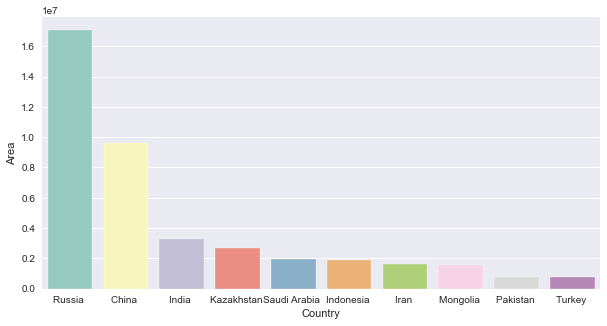

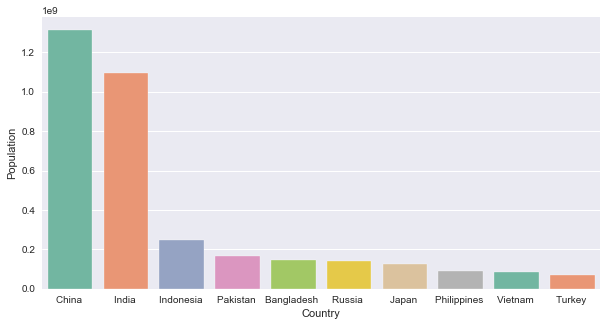

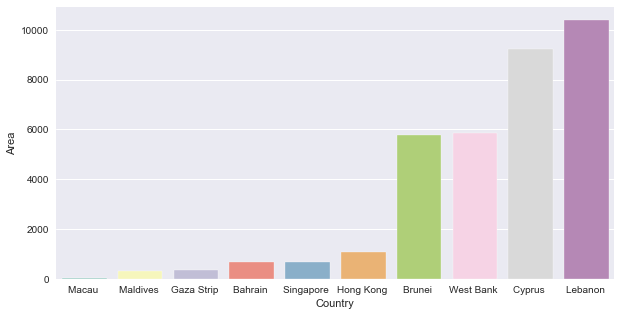

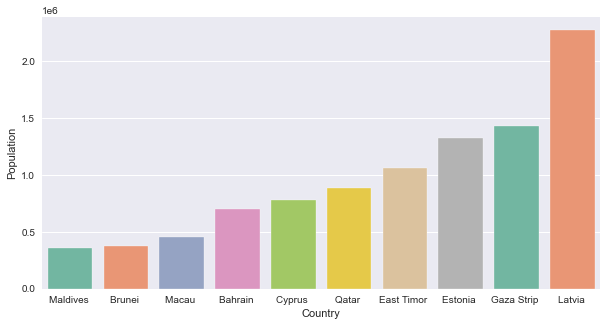

In [517]:
# Finding Top 10 largest and smallest countries with respect population and area for each CONTINENT.
# Sorting countires based on Area and population.
# Grouping the countries based on the 7 continents namely Asia,Africa, North America, SOuth America,
# Europe, Oceania,Antarctica
countries['Continent']= countries['Continent'].astype(object)
a=countries.query("Continent=='Asia'")
lar_ar=a.nlargest(10,'Area')
lar_pop=a.nlargest(10,'Population')
small_ar=a.nsmallest(10,'Area')
small_pop=a.nsmallest(10,'Population')
# print(a)

plt.figure(figsize=(10,5))
sns.barplot(lar_ar['Country'],lar_ar['Area'],palette='Set3')


plt.figure(figsize=(10,5))
sns.barplot(lar_pop['Country'],lar_pop['Population'],palette='Set2')


plt.figure(figsize=(10,5))
sns.barplot(small_ar['Country'],small_ar['Area'],palette='Set3')


plt.figure(figsize=(10,5))
sns.barplot(small_pop['Country'],small_pop['Population'],palette='Set2')


[Text(0, 0, 'Saint Helena '),
 Text(0, 0, 'Seychelles '),
 Text(0, 0, 'Sao Tome & Principe '),
 Text(0, 0, 'Mayotte '),
 Text(0, 0, 'Western Sahara '),
 Text(0, 0, 'Cape Verde '),
 Text(0, 0, 'Djibouti '),
 Text(0, 0, 'Equatorial Guinea '),
 Text(0, 0, 'Comoros '),
 Text(0, 0, 'Reunion ')]

<Figure size 576x396 with 0 Axes>

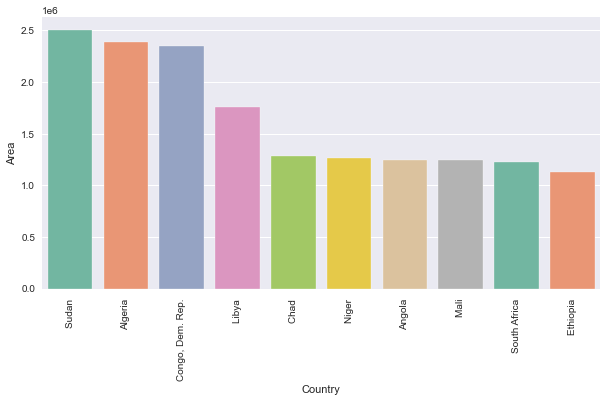

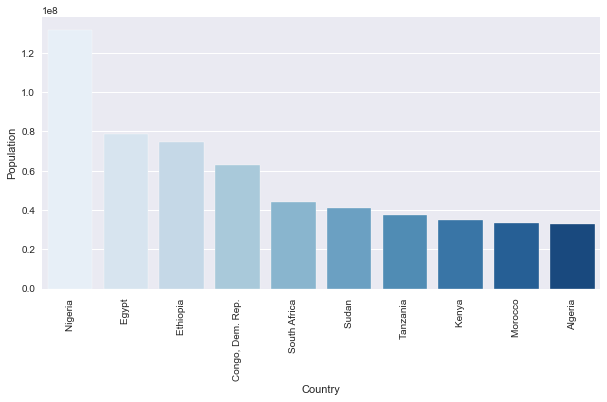

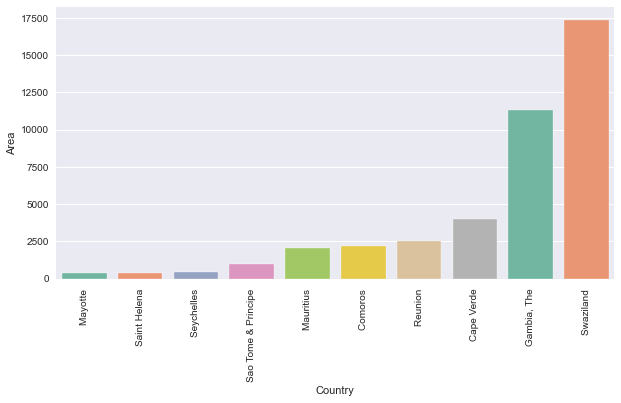

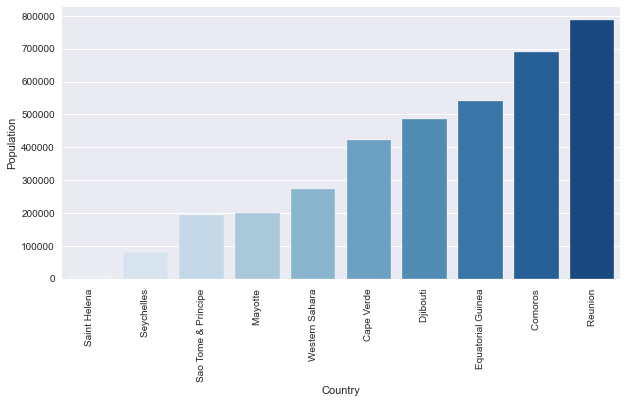

In [518]:
plt.clf()
# b=countries.query('Continent in ["Africa"]')
b=countries.query("Continent=='Africa'")
# print(b)
lar_ar=b.nlargest(10,'Area')
lar_pop=b.nlargest(10,'Population')
small_ar=b.nsmallest(10,'Area')
small_pop=b.nsmallest(10,'Population')

style.use('seaborn')
plt.figure(figsize=(10,5))
c = sns.barplot(lar_ar['Country'],lar_ar['Area'],palette='Set2')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c = sns.barplot(lar_pop['Country'],lar_pop['Population'],palette='Blues')
c.set_xticklabels(c.get_xticklabels(), rotation=90)


plt.figure(figsize=(10,5))
c = sns.barplot(small_ar['Country'],small_ar['Area'],palette='Set2')
c.set_xticklabels(c.get_xticklabels(), rotation=90)


plt.figure(figsize=(10,5))
c = sns.barplot(small_pop['Country'],small_pop['Population'],palette='Blues')
c.set_xticklabels(c.get_xticklabels(), rotation=90)



[Text(0, 0, 'St Pierre & Miquelon '),
 Text(0, 0, 'Greenland '),
 Text(0, 0, 'Bermuda '),
 Text(0, 0, 'Canada '),
 Text(0, 0, 'United States ')]

<Figure size 576x396 with 0 Axes>

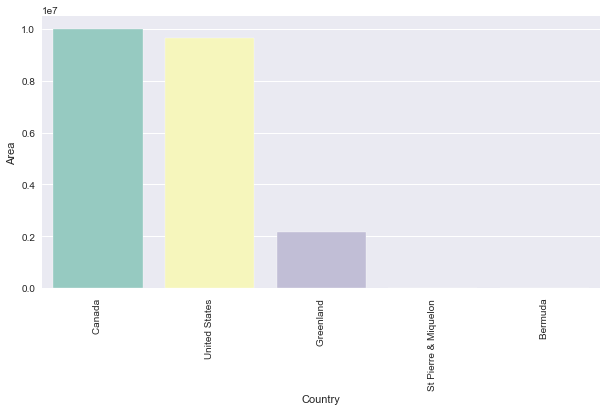

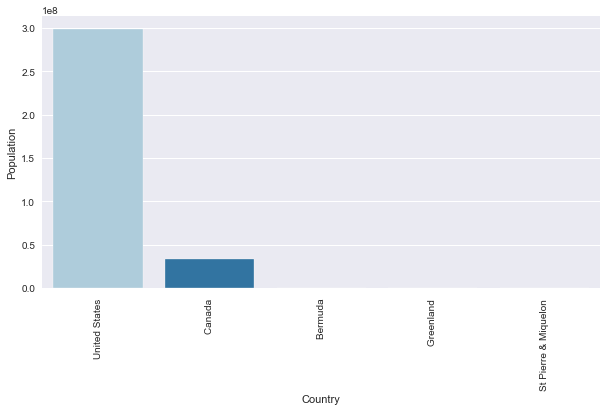

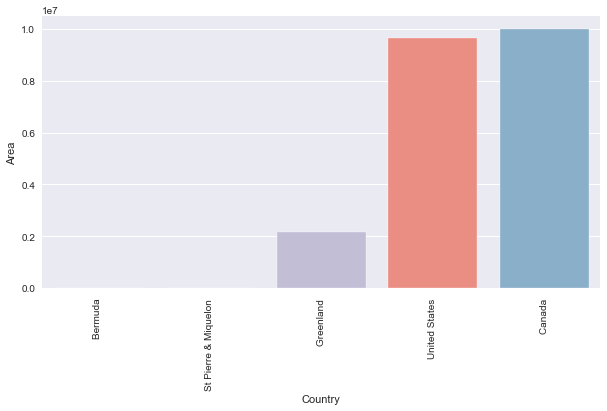

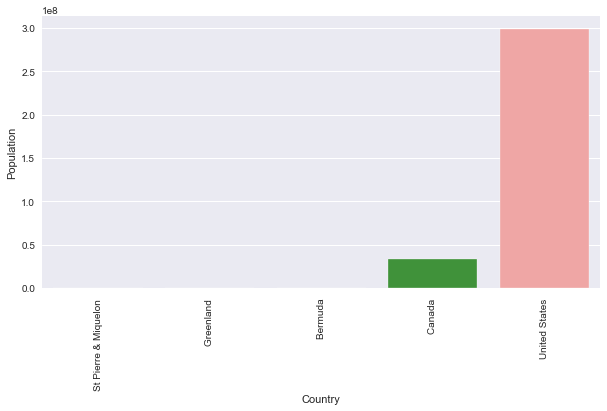

In [520]:
plt.clf()
c=countries.query("Continent=='North America'")
lar_ar=c.nlargest(10,'Area')
lar_pop=c.nlargest(10,'Population')
small_ar=c.nsmallest(10,'Area')
small_pop=c.nsmallest(10,'Population')

plt.figure(figsize=(10,5))
gr=sns.barplot(lar_ar['Country'],lar_ar['Area'],palette='Set3')
gr.set_xticklabels(gr.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
gr=sns.barplot(lar_pop['Country'],lar_pop['Population'],palette='Paired')
gr.set_xticklabels(gr.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
gr=sns.barplot(small_ar['Country'],small_ar['Area'],palette='Set3')
gr.set_xticklabels(gr.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
gr=sns.barplot(small_pop['Country'],small_pop['Population'],palette='Paired')
gr.set_xticklabels(gr.get_xticklabels(), rotation=90)


[Text(0, 0, 'Montserrat '),
 Text(0, 0, 'Anguilla '),
 Text(0, 0, 'Turks & Caicos Is '),
 Text(0, 0, 'British Virgin Is. '),
 Text(0, 0, 'Saint Kitts & Nevis '),
 Text(0, 0, 'Cayman Islands '),
 Text(0, 0, 'Dominica '),
 Text(0, 0, 'Antigua & Barbuda '),
 Text(0, 0, 'Aruba '),
 Text(0, 0, 'Grenada ')]

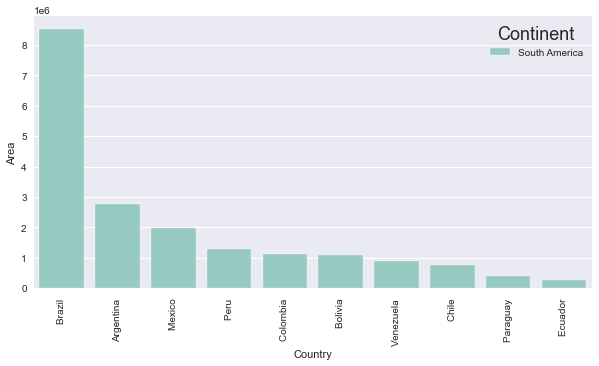

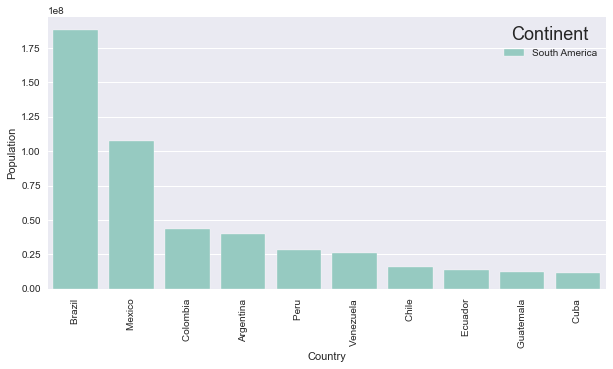

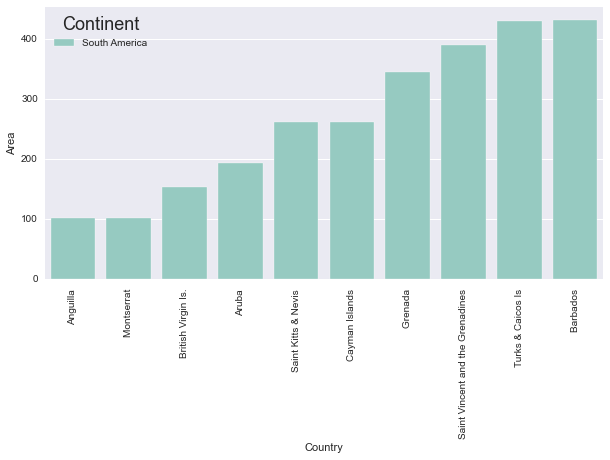

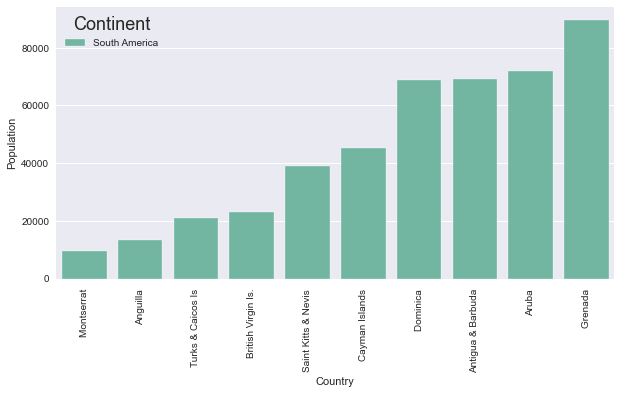

In [522]:
countries['Continent']= countries['Continent'].astype(object)
b=countries.query('Continent in ["South America"]')
lar_ar=b.nlargest(10,'Area')
lar_pop=b.nlargest(10,'Population')
small_ar=b.nsmallest(10,'Area')
small_pop=b.nsmallest(10,'Population')

plt.figure(figsize=(10,5))
c=sns.barplot(lar_ar['Country'],lar_ar['Area'],hue=lar_ar['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(lar_pop['Country'],lar_pop['Population'],hue=lar_pop['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_ar['Country'],small_ar['Area'],hue=small_ar['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_pop['Country'],small_pop['Population'],hue=small_pop['Continent'],palette='Set2')
c.set_xticklabels(c.get_xticklabels(), rotation=90)


[Text(0, 0, 'Gibraltar '),
 Text(0, 0, 'San Marino '),
 Text(0, 0, 'Monaco '),
 Text(0, 0, 'Liechtenstein '),
 Text(0, 0, 'Faroe Islands '),
 Text(0, 0, 'Guernsey '),
 Text(0, 0, 'Andorra '),
 Text(0, 0, 'Isle of Man '),
 Text(0, 0, 'Jersey '),
 Text(0, 0, 'Iceland ')]

<Figure size 576x396 with 0 Axes>

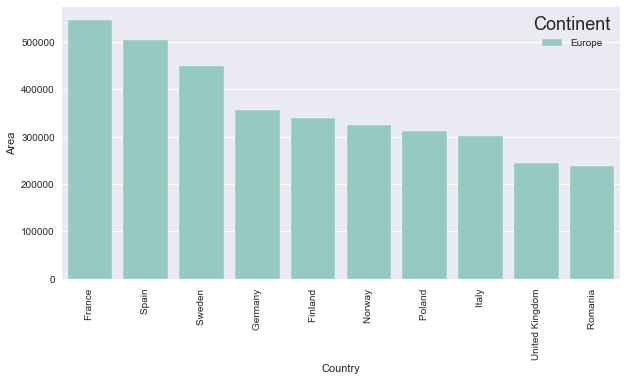

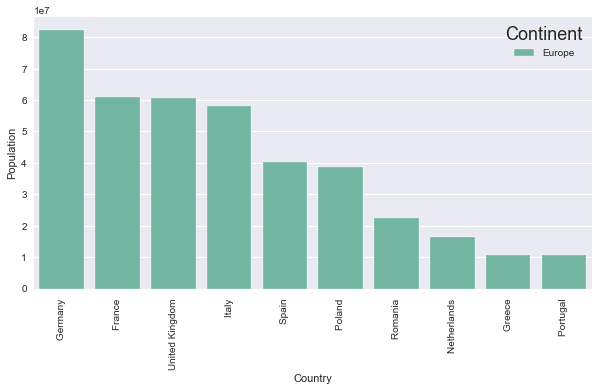

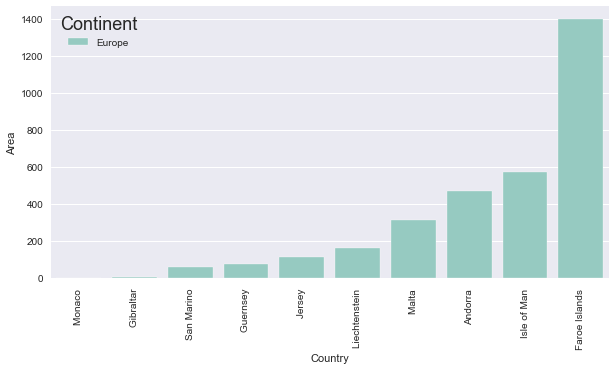

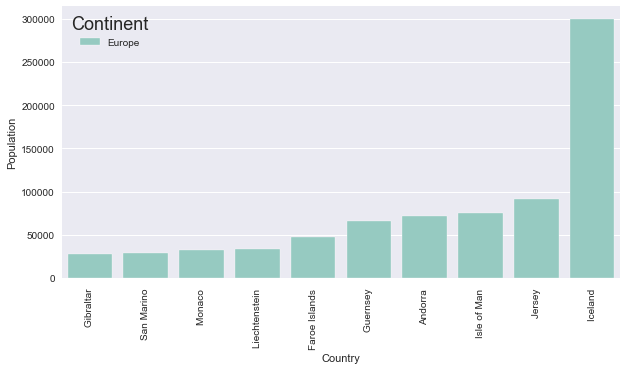

In [523]:
plt.clf()
countries['Continent']= countries['Continent'].astype(object)
a=countries.query('Continent in ["Europe"]')
lar_ar=a.nlargest(10,'Area')
lar_pop=a.nlargest(10,'Population')
small_ar=a.nsmallest(10,'Area')
small_pop=a.nsmallest(10,'Population')

plt.figure(figsize=(10,5))
c=sns.barplot(lar_ar['Country'],lar_ar['Area'],hue=lar_ar['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(lar_pop['Country'],lar_pop['Population'],hue=lar_pop['Continent'],palette='Set2')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_ar['Country'],small_ar['Area'],hue=small_ar['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_pop['Country'],small_pop['Population'],hue=small_pop['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)



[Text(0, 0, 'Tuvalu '),
 Text(0, 0, 'Nauru '),
 Text(0, 0, 'Wallis and Futuna '),
 Text(0, 0, 'Palau '),
 Text(0, 0, 'Cook Islands '),
 Text(0, 0, 'American Samoa '),
 Text(0, 0, 'Marshall Islands '),
 Text(0, 0, 'N. Mariana Islands '),
 Text(0, 0, 'Kiribati '),
 Text(0, 0, 'Micronesia, Fed. St. ')]

<Figure size 576x396 with 0 Axes>

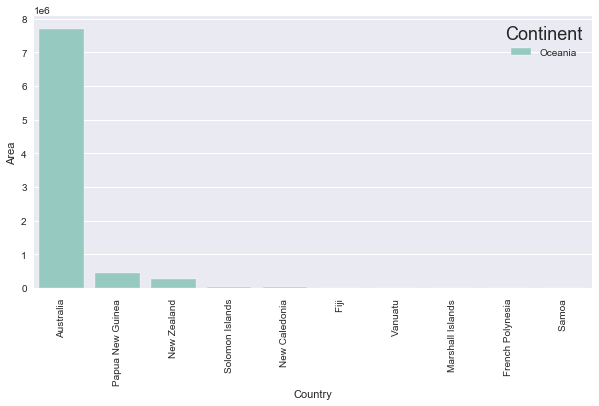

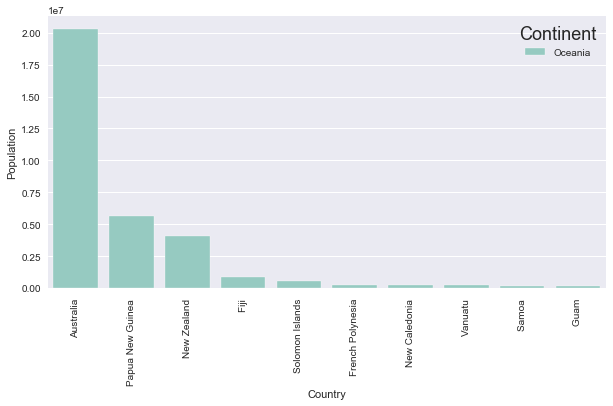

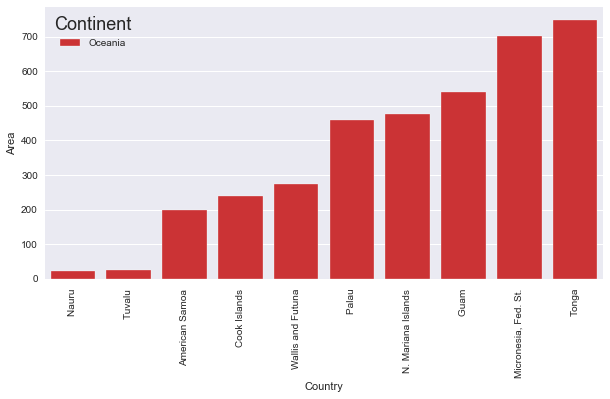

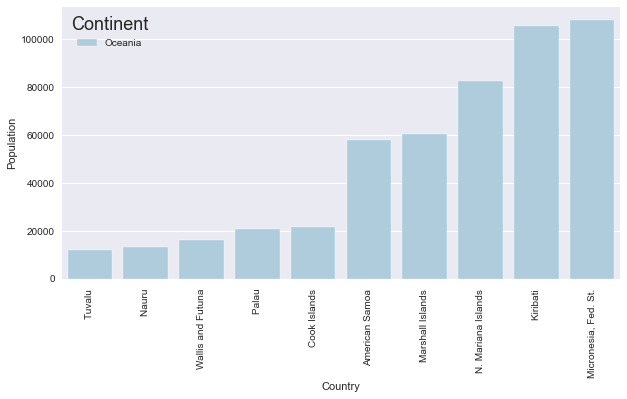

In [524]:
plt.clf()
countries['Continent']= countries['Continent'].astype(object)
a=countries.query('Continent in ["Oceania"]')
lar_ar=a.nlargest(10,'Area')
lar_pop=a.nlargest(10,'Population')
small_ar=a.nsmallest(10,'Area')
small_pop=a.nsmallest(10,'Population')

plt.figure(figsize=(10,5))
c=sns.barplot(lar_ar['Country'],lar_ar['Area'],hue=lar_ar['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(lar_pop['Country'],lar_pop['Population'],hue=lar_pop['Continent'],palette='Set3')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_ar['Country'],small_ar['Area'],hue=small_ar['Continent'],palette='Set1')
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))
c=sns.barplot(small_pop['Country'],small_pop['Population'],hue=small_pop['Continent'],palette='Paired')
c.set_xticklabels(c.get_xticklabels(), rotation=90)


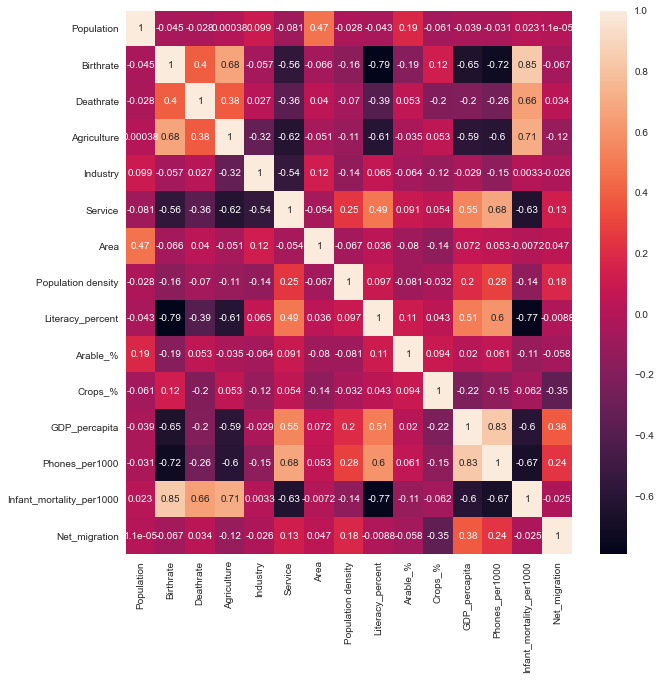

In [433]:
# CORRELATION MATRIX.
corrMatrix = countries.corr()
# print (corrMatrix)
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()